# **Part A: Preprocessing of imaging data**  
<i>**Latest update</i> - Dec 2024**  

#### **Authors:**  
[Oscar Dong](https://github.com/Awesomenous) (oscardong4@gmail.com) | [Thomas O'Neil](https://github.com/DrThomasOneil) (thomas.oneil@sydney.edu.au) | [Heeva Baharlou](heeva.baharlou@sydney.edu.com)  

##### The purpose of this notebook is to provide a consolidated approach to IMC analysis and forms the prerequisite steps to the IMComplete R package workflow. We focused 

Nature Method of the Year in 2024 was [**spatial proteomics**](https://www.nature.com/articles/s41592-024-02565-3). 

> Computational tools for spatial proteomics are the focus of the second Comment, from Yuval Bussi and Leeat Keren. These authors note that current image processing and analysis workflow are well defined but fragmented, with various steps happening back to back rather than in an integrated fashion. They envision a future for the field where image processing and analysis steps work in concert for improved biological discovery.

In response to these comments, we have committed to provide a comprehensive, complete and dynamic workflow. In part, we aimed to achieve this by compiling as much as we could into this pre-processing workflow. 

Particularly, we hve

<hr>

Some scripts adapted from [BodenmillerGroup/ImcSegmentationPipeline](https://github.com/BodenmillerGroup/ImcSegmentationPipeline) & [PENGLU-WashU/IMC_Denoise](https://github.com/PENGLU-WashU/IMC_Denoise) 

<i>**Therefore, make sure to also reference these studies:**</i>  
- Windhager, J., Zanotelli, V.R.T., Schulz, D. et al. An end-to-end workflow for multiplexed image processing and analysis. [Nat Protoc](https://doi.org/10.1038/s41596-023-00881-0) (2023).  
- Lu P, Oetjen K, Bender D, et al. IMC-Denoise: a content aware pipeline to enhance Imaging Mass Cytometry. [Nature Communications](https://www.nature.com/articles/s41467-023-37123-6), 14(1), 1601, 2023.  

<br>
<hr>

##### Planned future additions:  
- Simple compartmentalisation in python widget
- DAPI registration for improved cell segmentation
- Integration with immunofluorescence
- Integration with BIDCell - purpose to improve the initial segmentation mask prior to workflow.

<br>
<hr>


# **What is in this workflow**

This workflow aims to consolidate as many functions as possible in one python. The folder structure for this workflow is as follows:

```text
ImagingAnalysis/
├── IMComplete-Workflow
├── Experiment_name_1
│     └── raw
│            └── Sample1.zip
│            └── Sample2.zip
│            └── ...
│     └── analysis
│            └── 1_mcd_out
│            └── 2_denoise
│            └── 3_segmentation
│                   └── 3a_fullstack
│                   └── 3b_forSeg
│                   └── 3c_cellpose_crop
│                   └── 3d_cellpose_full
│                   └── 3e_cellpose_mask
│                   └── 3f_compartments
│            └── 4_pyprofiler_output
│     └── panel.csv
├── ...
├── Experiment_name_n


```
<hr> 

##### Below is a summary of the individual components of the workflow. Each is accompanied by a how-to video.  
### 1. Set up

Start with a root folder for your image analysis (e.g. `ImagingAnalysis`). From here, the `set up` section of this script will inform you on how to clone the [IMComplete-Workflow](https://github.com/CVR-MucosalImmunology/IMComplete-Workflow) GitHub repository. You'll also download the necessary functions from these repositories:  
- Functions from [BodenmillerGroup/ImcSegmentationPipeline](https://github.com/BodenmillerGroup/ImcSegmentationPipeline) which allow for the images to be extracted from the MCD file format.
- Functions from [PENGLU-WashU/IMC_Denoise](https://github.com/PENGLU-WashU/IMC_Denoise) which can be used to denoise your IMC images.

These contain files that will set up the conda environment to run the necessary functions. 

You'll also be prompted to set up your `raw` data files (as instructed in more detail [**here**](https://github.com/BodenmillerGroup/ImcSegmentationPipeline/blob/main/scripts/imc_preprocessing.ipynb)) and `panel.csv`. A template for the panel.csv can be found in the IMComplete-Workflow once the repository is downloaded. 

### 2. MCD extraction



###




## Order of the analysis
0. Set up
1. MCD extraction
2. Cellpose prep
3. Cellpose model training
4. Cellpose batch segmentation
5. Feature Extraction

# Set up

Anaconda is a program used to install packages needed for many steps of the pipeline to run. Follow the steps below to set up Anaconda and a `conda` environment:

**Step 1:** Install [**Anaconda** ](https://www.anaconda.com/download) <br>
**Step 2:** Once Anaconda is installed, navigate to the relevant command line interface:
<br>
<div align="center">

| Windows                                                                                            | macOS                                                                                                      |
|----------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| 1. Search for **'Anaconda Prompt'** in the taskbar search <br> 2. Select **Anaconda Prompt**  <br> | 1. Use `cmd + space` to open Spotlight Search  <br> 2. Type **'Terminal'** and press `return` to open <br> |

</div>
<br>

**Step 3:** Set your directory to the analysis folder (and make folders)

```bash
cd /Desktop/ImageAnalysis
```

**Step 4:** Clone the IMComplete repository.

```bash
git clone --recursive https://github.com/CVR-MucosalImmunology/IMComplete-Workflow.git
```

**Step 5:** Create a conda environment and install some  packages (in one line)

```bash
conda env create -f dev_IMComplete-Workflow/environment.yml
```
**Step 6:** Activate the conda environment

```bash
conda activate IMComplete
```

**Step 7:** Clone the extra repositories:    
- [BodenmillerGroup/ImcSegmentationPipeline](https://github.com/BodenmillerGroup/ImcSegmentationPipeline): Windhager, J., Zanotelli, V.R.T., Schulz, D. et al. An end-to-end workflow for multiplexed image processing and analysis. [Nat Protoc](https://doi.org/10.1038/s41596-023-00881-0) (2023).  
```bash
git clone --recursive https://github.com/BodenmillerGroup/ImcSegmentationPipeline.git
```  
- [PENGLU-WashU/IMC_Denoise](https://github.com/PENGLU-WashU/IMC_Denoise): Lu P, Oetjen K, Bender D, et al. IMC-Denoise: a content aware pipeline to enhance Imaging Mass Cytometry. [Nature Communications](https://www.nature.com/articles/s41467-023-37123-6), 14(1), 1601, 2023.  
```bash
git clone --recursive https://github.com/PENGLU-WashU/IMC_Denoise.git
```

**Step 8:** Install the packages from these two repositories

```bash
python -m pip install -e ./ImcSegmentationPipeline
```
```bash
python -m pip install -e ./IMC-Denoise
```

**Step 9:** GPU-acceleration

Unfortunately, parts of this workflow will require GPU-acceleration: Cell segmentation, Denoise, PyProfiler (will run quicker, but not necessary).

You will need to install Pytorch and pytorch-cuda versions that are suitable for your PC. Instructions are found [here](https://pytorch.org/get-started/previous-versions/)

```bash
conda install pytorch==2.4.1 torchvision==0.19.1 torchaudio==2.4.1 pytorch-cuda=12.4 -c pytorch -c nvidia
```
**Step 10:** Lastly, install Cellpose

```bash
python -m pip install PyQt5 cellpose[gui] tensorflow keras
```

<hr>

You can check the installation requirements with the following function

In [7]:
import PyMComplete

PyMComplete.check_setup()

Checking required packages in the current Conda environment...

  All required packages are installed and meet the required versions.

-----------------

Checking that CUDA has been installed properly...

  GPU acceleration via CUDA is available


<hr>

## Create a Project folder for your analysis

The following function will create the folder structure for this workflow and generate a template `panel.csv`.

Set `rootdir` as your `ImageAnalysis` folder directory and `projdir` as your project folder name.

In [22]:
import PyMComplete

rootdir = "D:/Dev-IMComplete"
projdir = "LizIMC"


Project 'LizIMC' created successfully at 'D:/Dev-IMComplete\LizIMC'.


In [ ]:
PyMComplete.newProj(rootdir, projdir)

<hr>

## Set up your raw folder

Your MCD files should be zipped 

The [**BodenmillerGroup**](https://github.com/BodenmillerGroup/ImcSegmentationPipeline/blob/main/scripts/imc_preprocessing.ipynb) ImcSegmentationPipeline Notebook covers this more detail. 


# MCD extraction

**MCD extraction**  
<span style="color:grey; opacity: 0.5">Cellpose prep</span>  
<span style="color:grey; opacity: 0.5">Cellpose model training</span>  
<span style="color:grey; opacity: 0.5">Cellpose batch segmentation</span>    
<span style="color:grey; opacity: 0.5">Feature Extraction</span>    

We have wrapped the Bodenmiller MCD extraction function. 

In [23]:
import PyMComplete
import os

PyMComplete.bodenmiller_mcd_extract(os.path.join(rootdir,projdir), 
                                    denoise=1, 
                                    panel="panel.csv")

ERROR:root:Error reading panorama 3 from file 20241031 p10 b1 LN162.1 AS01 6 IFNgc_np nc.mcd: Image is not numeric, but NoneType.
ERROR:root:Error reading acquisition 4 from file 20241031 p10 b1 LN162.1 R848 14 IFNgc_posprobe_nc.mcd: MCD file '20241031 p10 b1 LN162.1 R848 14 IFNgc_posprobe_nc.mcd' corrupted: inconsistent acquisition image data size


Done!


# Denoise (TODO)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tifffile as tp
from IMC_Denoise.IMC_Denoise_main.DIMR import DIMR
from IMC_Denoise.IMC_Denoise_main.DeepSNiF import DeepSNiF
from IMC_Denoise.DeepSNiF_utils.DeepSNiF_DataGenerator import DeepSNiF_DataGenerator

# Release memory
if 'generated_patches' in globals():
    del generated_patches

channel_name = "Tm169"
Raw_directory = "D:/Dev-IMComplete/LizIMC/analysis/2_denoise" # change this directory to your Raw_image_directory.
Save_directory = "D:/Dev-IMComplete/LizIMC/analysis/dn_out"

n_neighbours = 4 # Larger n enables removing more consecutive hot pixels. 
n_iter = 3 # Iteration number for DIMR
window_size = 5 # Slide window size. For IMC images, window_size = 3 is fine.

DataGenerator = DeepSNiF_DataGenerator(channel_name = channel_name, n_neighbours = n_neighbours, n_iter = n_iter, window_size = window_size)
generated_patches = DataGenerator.generate_patches_from_directory(load_directory = Raw_directory)
print('The shape of the generated training set is ' + str(generated_patches.shape) + '.')

The shape of the generated training set is (3328, 64, 64).


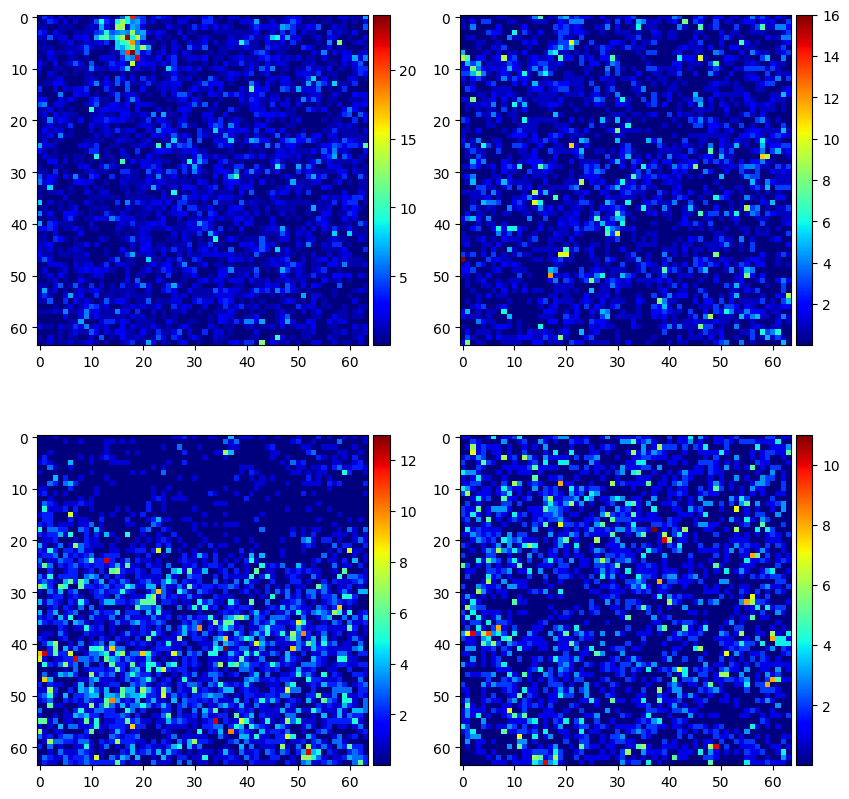

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(generated_patches[0,:,:], cmap = 'jet')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(generated_patches[100,:,:], cmap = 'jet')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(generated_patches[1000,:,:], cmap = 'jet')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(generated_patches[-1,:,:], cmap = 'jet')
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical')

In [48]:
train_epoches = 200 # training epoches, which should be about 200 for a good training result. The default is 200.
train_initial_lr = 1e-3 # inital learning rate. The default is 1e-3.
train_batch_size = 128 # training batch size. For a GPU with smaller memory, it can be tuned smaller. The default is 256.
pixel_mask_percent = 0.2 # percentage of the masked pixels in each patch. The default is 0.2.
val_set_percent = 0.15 # percentage of validation set. The default is 0.15.
loss_function = "I_divergence" # loss function used. The default is "I_divergence".
weights_name = None # trained network weights saved here. If None, the weights will not be saved.
loss_name = None # training and validation losses saved here, either .mat or .npz format. If not defined, the losses will not be saved.
weights_save_directory = None # location where 'weights_name' and 'loss_name' saved.
# If the value is None, the files will be saved in a sub-directory named "trained_weights" of  the current file folder.
is_load_weights = False # Use the trained model directly. Will not read from saved one.
lambda_HF = 3e-6 # HF regularization parameter
deepsnif = DeepSNiF(train_epoches = train_epoches, 
                  train_learning_rate = train_initial_lr,
                  train_batch_size = train_batch_size,
                  mask_perc_pix = pixel_mask_percent,
                  val_perc = val_set_percent,
                  loss_func = loss_function,
                  weights_name = weights_name,
                  loss_name = loss_name,
                  weights_dir = weights_save_directory, 
                  is_load_weights = is_load_weights,
                  lambda_HF = lambda_HF)

In [49]:
train_loss, val_loss = deepsnif.train(generated_patches)


Each training patch with shape of (64, 64) will mask 8 pixels.
Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - loss: 0.5172 - val_loss: 0.5330 - learning_rate: 0.0010
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - loss: 0.4411 - val_loss: 0.4131 - learning_rate: 0.0010
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.3735 - val_loss: 0.3549 - learning_rate: 0.0010
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.3061 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.2405 - val_loss: 0.2273 - learning_rate: 0.0010
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - loss: 0.1847 - val_loss: 0.2150 - learning_rate: 0.0010
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - loss: 0.1422 - val_loss: 0.1570 - learning_rate: 0.0010
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - loss: 0.1085 - val_loss: 0.1390 - learning_rate: 0.0010
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/s

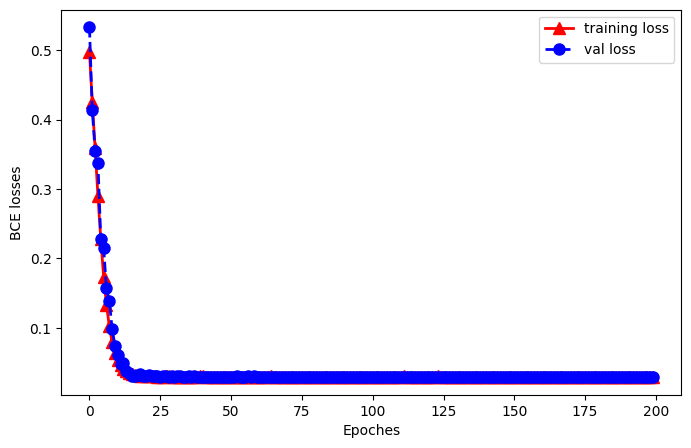

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(np.array(range(len(train_loss))),train_loss, color='red', marker='^', linewidth=2, markersize=8)
plt.plot(np.array(range(len(val_loss))),val_loss, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.xlabel('Epoches')
plt.ylabel('BCE losses')
plt.legend(['training loss', 'val loss'])
plt.show()

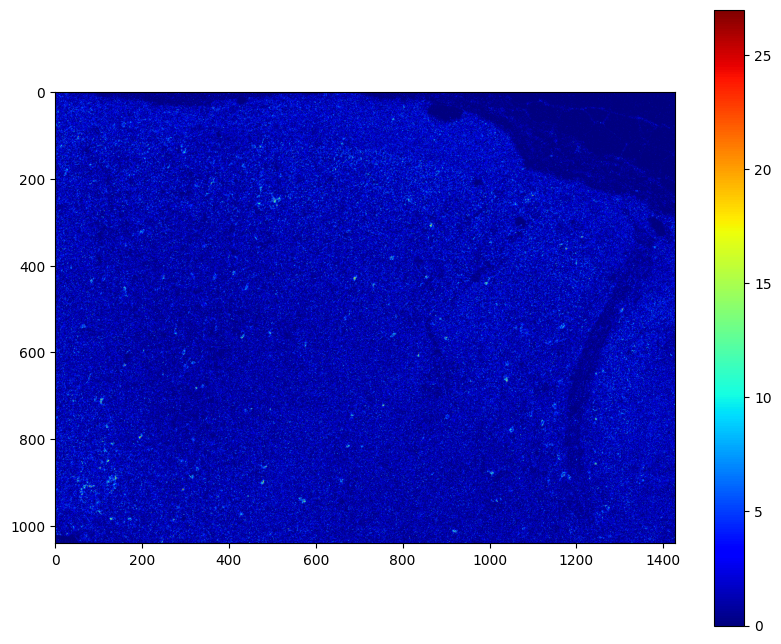

In [51]:
# read a CD38 raw image.
Raw_img_name = "D:/Dev-IMComplete/LizIMC/analysis/2_denoise/20241031 p10 b1 LN162.1 AS01 6 IFNgc_np nc_s0_a1_ac.ome/Tm169-Anti_Cy5_Clec9a_Tm169.tiff" # change to your raw image
Img_raw = tp.imread(Raw_img_name)
plt.figure(figsize = (10,8))
plt.imshow(Img_raw, vmin = 0, vmax = 0.5*np.max(Img_raw), cmap = 'jet')
plt.colorbar()
plt.show()

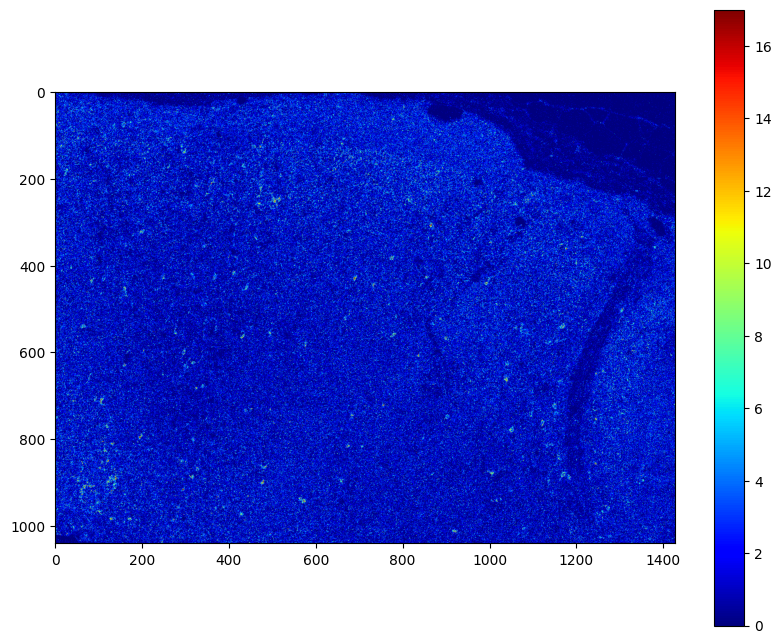

In [52]:
Img_DIMR = DIMR(n_neighbours = n_neighbours, n_iter = n_iter, window_size = window_size).perform_DIMR(Img_raw)
plt.figure(figsize = (10,8))
plt.imshow(Img_DIMR, vmin = 0, vmax = 0.5*np.max(Img_DIMR), cmap = 'jet')
plt.colorbar()
plt.show()

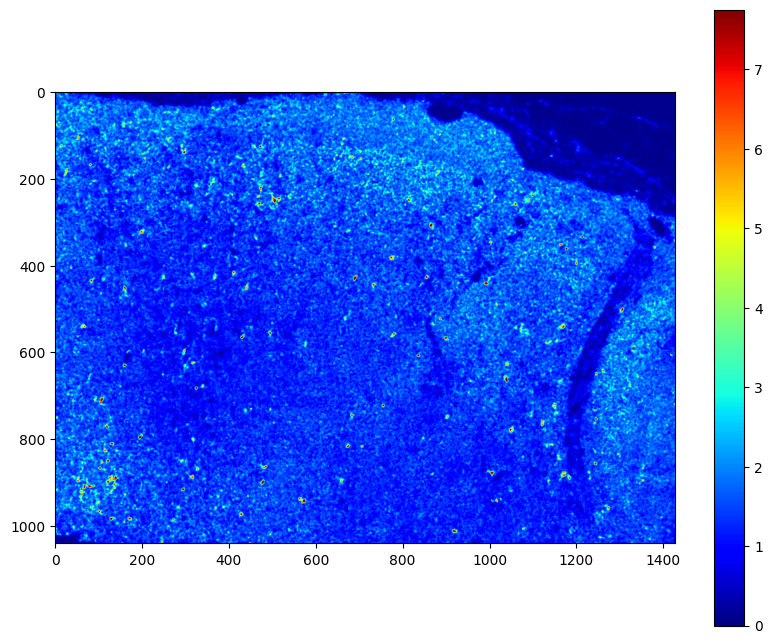

In [53]:
# perform DIMR and DeepSNiF algorithms for low SNR raw images.
Img_DIMR_DeepSNiF = deepsnif.perform_IMC_Denoise(Img_raw, n_neighbours = n_neighbours, n_iter = n_iter, window_size = window_size)
plt.figure(figsize = (10,8))
plt.imshow(Img_DIMR_DeepSNiF, vmin = 0, vmax = 0.5*np.max(Img_DIMR_DeepSNiF), cmap = 'jet')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IMC_Denoise.DeepSNiF_utils.DeepSNiF_DataGenerator import DeepSNiF_DataGenerator, load_training_patches
from IMC_Denoise.IMC_Denoise_main.DeepSNiF import DeepSNiF

# Release memory
if 'generated_patches' in globals():
    del generated_patches
    
channel_name = "Tm169"
Raw_directory = "D:/Dev-IMComplete/LizIMC/analysis/2_denoise" # change this directory to your Raw_image_directory.
Save_directory = None # If None, it will be saved in the default folder.

n_neighbours = 4 # Larger n enables removing more consecutive hot pixels. 
n_iter = 3 # Iteration number for DIMR

DataGenerator = DeepSNiF_DataGenerator(channel_name = channel_name, n_neighbours = n_neighbours, n_iter = n_iter)
generated_patches = DataGenerator.generate_patches_from_directory(load_directory = Raw_directory)
if DataGenerator.save_patches(generated_patches, save_directory = Save_directory):
    print('Data generated successfully!')

In [ ]:
import subprocess
import pandas as pd

# Path to the CSV file containing the channel names
panel_csv_path = "D:/Dev-IMComplete/LizIMC/panel.csv"
column_name = "Metal Tag"

# Paths and parameters for the IMC-Denoise script
script_path = "IMC_Denoise/scripts/Data_generation_DeepSNiF_script.py"
raw_directory = "LizIMC/analysis/2_denoise"
save_directory = "LizIMC/analysis/dn_out"
n_neighbours = "4"
n_iter = "3"
slide_window_size = "3"
ratio_thresh = "0.8"

# Read the channel names from the CSV
panel_df = pd.read_csv(panel_csv_path)
filtered_df = panel_df[panel_df["Full"] == 1]
channel_names = filtered_df["Metal Tag"]

# Iterate over each channel name and run the script
for channel_name in channel_names:
    print(f"Running IMC-Denoise for channel: {channel_name}")
    try:
        subprocess.run(
            [
                "python", script_path,
                "--channel_name", str(channel_name),
                "--Raw_directory", raw_directory,
                "--Save_directory", save_directory,
                "--n_neighbours", n_neighbours,
                "--n_iter", n_iter,
                "--slide_window_size", slide_window_size,
                "--ratio_thresh", ratio_thresh,
            ],
            check=True,  # Raise an error if the command fails
        )
        print(f"Successfully processed channel: {channel_name}")
    except subprocess.CalledProcessError as e:
        print(f"Error processing channel {channel_name}: {e}")


In [72]:
import pandas as pd

# Path to the CSV file containing the channel names
# Read the channel names from the CSV
panel_df = pd.read_csv("D:/Dev-IMComplete/LizIMC/panel.csv")
filtered_df = panel_df[panel_df["Full"] == 1]
channel_names = filtered_df["Metal Tag"]

with open("D:/Dev-IMComplete/LizIMC/tags.txt", "w") as txt_file:
    for tag in channel_names:
        txt_file.write(f"{tag}\n")


In [ ]:
Get-Content "LizIMC/tags.txt" | ForEach-Object { 
    python IMC_Denoise/scripts/Data_generation_DeepSNiF_script.py `
        --channel_name $_ `
        --Raw_directory LizIMC/analysis/2_denoise `
        --Save_directory LizIMC/analysis/dn_out `
        --n_neighbours 4 `
        --n_iter 3 `
        --slide_window_size 3 `
        --ratio_thresh 0.8
}

In [ ]:
python IMC_Denoise/scripts/Combine_multiple_datasets.py --load_directory LizIMC/analysis/dn_out --save_directory LizIMC/analysis/dn_out_2 --saved_training_set_name out_file.npz

In [ ]:
Get-Content "LizIMC/tags.txt" | ForEach-Object { 
    python IMC_Denoise/scripts/Predict_DIMR_batch.py `
        --channel_name $_ `
        --load_directory LizIMC/analysis/2_denoise `
        --save_directory LizIMC/analysis/dn_out_3 `
        --n_neighbours 4 `
        --n_iter 3 `
        --slide_window_size 3
}


# Cellpose preparation

<strike>MCD extraction</strike>  
**Cellpose prep**  
<span style="color:grey; opacity: 0.5">Cellpose model training</span>  
<span style="color:grey; opacity: 0.5">Cellpose batch segmentation</span>    
<span style="color:grey; opacity: 0.5">Feature Extraction</span>    

Set your variables before running. Identify the `DNA` channel and the `square size` (in pixels) you want to use for cellpose training

In [5]:
dna = "191Ir_191Ir_DNA1"
square_size = 200
projdir = os.path.join(rootdir,projdir)

In [7]:
import os
import random
import numpy as np
import pandas as pd
from skimage import io, exposure, img_as_uint

os.chdir(projdir)

# Define directories
dir_images =  os.path.join(projdir,"analysis","3_segmentation - adipo","3b_forSeg")
im_output =  os.path.join(projdir,"analysis","3_segmentation - adipo","3d_cellpose_full")
crop_output =  os.path.join(projdir,"analysis","3_segmentation - adipo","3c_cellpose_crop")
panel_file = os.path.join(projdir,"panel_adipo.csv")

# load image list
image_list = [f for f in os.listdir(dir_images) if f.endswith(('.tiff', '.tif'))]

# read panel
panel = pd.read_csv(panel_file)
segmentation_targets = panel.loc[panel['Segment'] == 1, 'Target'].tolist()
print("Segmentation Targets:", segmentation_targets)

# get indices of dna channel
dna_index = [i for i, target in enumerate(segmentation_targets) if target == dna]

# crop and compress each image
for image_file in image_list:
    image_path = os.path.join(dir_images, image_file)
    image = io.imread(image_path)
    im_title = os.path.splitext(image_file)[0]
    
    # normalise
    normalized_stack = []
    for i in range(image.shape[0]): 
        channel = image[i, :, :]
        normalized = exposure.rescale_intensity(channel, in_range='image', out_range=(0, 1))
        normalized_stack.append(img_as_uint(normalized))
    normalized_stack = np.stack(normalized_stack)
    
    # get dna channel
    if dna_index:
        # keep only the first instance of dna
        dna_channel = normalized_stack[dna_index[0]]
        
        # remove dna from segmentation stack
        for idx in sorted(dna_index, reverse=True):
            normalized_stack = np.delete(normalized_stack, idx, axis=0)
    else: #error message if dna not found
        raise ValueError("DNA channel not found in segmentation targets.")
    
    # create mask for surface segmentation
    surface_mask = np.mean(normalized_stack, axis=0).astype(np.uint16)
    
    # create empty channel - for cellpose colour scheme to avoid red/green and combine in order empty > segment > dna
    empty_channel = np.zeros_like(dna_channel, dtype=np.uint16)
    # empty -> surface mask -> DNA
    composite_stack = np.stack([empty_channel, surface_mask, dna_channel])
    
    # save
    im_output_path = os.path.join(im_output, f"{im_title}_CpSeg.tiff")
    io.imsave(im_output_path, composite_stack)
    
    # get crop dimensions
    height, width = composite_stack.shape[1:3]
    if width < square_size or height < square_size:
        # if image is smaller than crop size, save image itself as the crop
        crop_output_path = os.path.join(crop_output, f"{im_title}_CpCrop.tiff")
        io.imsave(crop_output_path, composite_stack)
        print(f"Image {im_title} is smaller than the cropping size. Saved without cropping.")
        continue

    # create the crop and save
    workable_x = width - square_size
    workable_y = height - square_size
    rand_x = random.randint(0, workable_x)
    rand_y = random.randint(0, workable_y)
    cropped = composite_stack[:, rand_y:rand_y + square_size, rand_x:rand_x + square_size]
    crop_output_path = os.path.join(crop_output, f"{im_title}_CpCrop.tiff")
    io.imsave(crop_output_path, cropped)
print("Done!")

Segmentation Targets: ['166Er_166Er_Perilipin1', '191Ir_191Ir_DNA1']
Image 20241031 p10 b1 LN162.1 AS01 6 IFNgc_np nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241031 p10 b1 LN162.1 mock 12 IFNgc_np nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241031 p10 b1 LN162.1 R848 14 IFNgc_posprobe_nc_s0_a1_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241031 p10 b1 LN162.1 R848 14 IFNgc_posprobe_nc_s0_a4_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241101 p10 b1 LN179 AS01 17 IFNgc_np nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.


C:\Users\daniel.buffa\AppData\Local\Temp\ipykernel_26184\1119662594.py:79: UserWarning: D:/Dev-IMComplete\LizIMC\analysis\3_segmentation - adipo\3c_cellpose_crop\20241101 p10 b1 LN179 mock 18 IFNgc_np nc_s0_a1_ac_segment_CpCrop.tiff is a low contrast image
  io.imsave(crop_output_path, cropped)


Image 20241101 p10 b1 LN179 R848 17 IFNgc_posprobe nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241102 LN158.1 AS01 13 p10 b2 IFNgc_np nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241102 LN158.1 R848 22 p10 b3 IFNgc_posprobe nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241108 p10 b1 LN162.1 T0h 12 IFNgc_np nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241114 LN70 R848 6 IFNgc_pos probe nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241114 LN70 T0h 7 IFNgc_np nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.


C:\Users\daniel.buffa\AppData\Local\Temp\ipykernel_26184\1119662594.py:79: UserWarning: D:/Dev-IMComplete\LizIMC\analysis\3_segmentation - adipo\3c_cellpose_crop\20241115 LN146.1 R848 17 IFNgc_pos probe nc_s0_a1_ac_segment_CpCrop.tiff is a low contrast image
  io.imsave(crop_output_path, cropped)


Image 20241115 LN146.1 R848 17 IFNgc_pos probe nc_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241121 panel 10 batch 4 9 LN212 LN217 11 AS01 mock_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241121 panel 10 batch 4 9 LN212 LN217 11 AS01 mock_s0_a4_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241121 panel 10 batch 4 LN154 11 AS01 mock R848_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241121 panel 10 batch 4 LN154 11 AS01 mock R848_s0_a5_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241121 panel 10 batch 4 LN223.2 5 AS01 mock_s0_a2_ac_segment is smaller than the cropping size. Saved without cropping.
Image 20241121 panel 10 batch 4 LN223.2 5 AS01 mock_s0_a4_ac_segment is smaller than the cropping size. Saved without cropping.
Done!


# Cell pose 

In [ ]:
python -m cellpose

In [20]:
# Set your required variables here
model_path = "D:\Dev-IMComplete\IFMasksOnIMCModel_HumanColon_TN3_CD12_FT1"
channels = [2, 3] # This means Channel 1 was 'Green' and Channel 2 was 'Blue' (1 = R, 2 = G, 3 = B)
cell_diameter = 12.4
flow_threshold = 3
cellprob_threshold = -6

In [ ]:
# Import libraries
import os
import skimage.io
from cellpose import models, core
from cellpose.io import logger_setup
import shutil
from pathlib import Path

# Define Cellpose model
model = models.CellposeModel(gpu=core.use_gpu(), pretrained_model=model_path)

# Set and create directories
analysis = Path(projdir)
image_dir = analysis / "analysis/3_segmentation/3d_cellpose_full"
mask_dir = analysis / "analysis/3_segmentation/3e_cellpose_mask"

# Call logger_setup to have output of cellpose written
logger_setup()

# Get list of image files
files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".tiff")]  # Adjust the file extension if necessary
imgs = [skimage.io.imread(f) for f in files]

# Run segmentation
masks, flows, styles = model.eval(imgs, diameter=cell_diameter, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold, channels=channels)

# Save mask images
for idx, mask in enumerate(masks):
    original_path = Path(files[idx])
    new_path = mask_dir / (original_path.stem + "_mask.tif")
    skimage.io.imsave(new_path, mask)


print("Done!")


NameError: name 'model_path' is not defined

# PyProfiler



In [6]:
import os
import time
import numpy as np
import pandas as pd
from tifffile import imread
from scipy.ndimage import center_of_mass, find_objects
import torch

# Arguments to control data collection
mean = 1  # Collect mean fluorescence
shape = 1  # Collect shape metrics (Area, Eccentricity)
geometry = 1  # Collect geometry (contours)
compartment = 1  # Collect compartment metrics

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set working directory
os.chdir(projdir)

# Define directories for masks, stacks, and compartments
masks_dir = os.path.join(projdir, "analysis/3_segmentation/3e_cellpose_mask")
stacks_dir = os.path.join(projdir, "analysis/3_segmentation/3a_fullstack")
compartments_dir = os.path.join(projdir, "analysis/3_segmentation/3f_compartments")

# Get list of masks and stacks
mask_files = [f for f in os.listdir(masks_dir) if f.endswith(('.tif', '.tiff'))]
stack_files = [f for f in os.listdir(stacks_dir) if f.endswith(('.tif', '.tiff'))]

# Match mask and stack files by name
image_names = [os.path.splitext(f)[0].replace("_segment_CpSeg_mask", "") for f in mask_files]

# Identify compartments if applicable
if compartment:
    compartment_folders = [f for f in os.listdir(compartments_dir) if os.path.isdir(os.path.join(compartments_dir, f))]
    if not compartment_folders:
        print("No folders found in the compartments directory. Disabling compartment processing.")
        compartment = 0
    else:
        compartment_masks = {}
        for folder in compartment_folders:
            folder_path = os.path.join(compartments_dir, folder)
            compartment_masks[folder] = {
                name: os.path.join(folder_path, f)
                for f in os.listdir(folder_path)
                if f.endswith(('.tif', '.tiff'))
            }

# Process each image
all_results = []
start_time = time.time()

for name in image_names:
    print(f"Processing {name}...")

    # Load mask and stack
    mask_path = os.path.join(masks_dir, f"{name}_segment_CpSeg_mask.tif")
    stack_path = os.path.join(stacks_dir, f"{name}_full.tiff")

    cell_mask = imread(mask_path)  # Single-layer TIFF mask
    fluorescence_stack = imread(stack_path)  # Multi-layer TIFF

    # Convert to PyTorch tensors
    cell_mask_tensor = torch.tensor(cell_mask, device=device, dtype=torch.int32)
    fluorescence_stack_tensor = torch.tensor(fluorescence_stack, device=device, dtype=torch.float32)

    # Load panel.csv file
    panel_path = os.path.join(projdir, "panel.csv")
    panel = pd.read_csv(panel_path)
    selected_markers = panel[panel['Full'] == 1].reset_index(drop=True)
    selected_indices = range(len(selected_markers))  # Indices correspond to stack order
    selected_names = selected_markers['Target'].values  # Names of relevant markers

    # Extract unique CellIDs (include CellID 0 for background)
    cell_ids = torch.unique(cell_mask_tensor).cpu().numpy()

    # Initialize results for this image
    results = []

    # Check for compartment masks
    missing_compartments = []
    compartment_data = {}
    if compartment:
        for comp_name, comp_files in compartment_masks.items():
            comp_file = comp_files.get(f"{name}_compartment.tiff")
            if not comp_file:
                missing_compartments.append(comp_name)
            else:
                compartment_data[comp_name] = torch.tensor(imread(comp_file), device=device, dtype=torch.float32)

        if missing_compartments:
            action = input(f"Missing compartments {missing_compartments} for {name}. Choose action: \n1) Continue with NA\n2) Stop\n3) Ignore compartment data\nEnter choice: ")
            if action == "2":
                print("Stopping execution. Please address missing compartments.")
                exit()
            elif action == "3":
                compartment = 0
                compartment_data = {}

    # Process each cell
    for cell_id in cell_ids:
        cell_region = (cell_mask_tensor == cell_id)
        cell_data = {"Image": name, "CellID": int(cell_id)}

        if shape:
            # Area
            cell_data["Area"] = int(torch.sum(cell_region).item())

            # Centroid
            if torch.any(cell_region):
                indices = torch.nonzero(cell_region, as_tuple=True)
                centroid_y = torch.mean(indices[0].float()).item()
                centroid_x = torch.mean(indices[1].float()).item()
            else:
                centroid_y, centroid_x = np.nan, np.nan
            cell_data["CentroidX"] = centroid_x
            cell_data["CentroidY"] = centroid_y

            # Bounding box and Eccentricity
            bbox_indices = torch.nonzero(cell_region)
            if bbox_indices.shape[0] > 0:
                height = bbox_indices[:, 0].max().item() - bbox_indices[:, 0].min().item() + 1
                width = bbox_indices[:, 1].max().item() - bbox_indices[:, 1].min().item() + 1
                cell_data["Eccentricity"] = height / width if width != 0 else np.nan
            else:
                cell_data["Eccentricity"] = np.nan

        if mean:
            for idx, marker in zip(selected_indices, selected_names):
                fluorescence_slice = fluorescence_stack_tensor[idx]
                mean_intensity = torch.mean(fluorescence_slice[cell_region].float()).item() / 65535  # Normalize to 16-bit range
                cell_data[marker] = mean_intensity

        if compartment:
            for comp_name, comp_mask in compartment_data.items():
                comp_region = comp_mask[cell_region]
                comp_mean = torch.sum(comp_region).item() / cell_data["Area"] if cell_data["Area"] > 0 else np.nan
                cell_data[comp_name] = comp_mean

        # Append cell data to results
        results.append(cell_data)

    # Append image results to all results
    all_results.extend(results)

# Create a DataFrame from all results
final_df = pd.DataFrame(all_results)

# Save to CSV
output_path = os.path.join(projdir, "analysis/4_pyprofiler_output/cell_data_combined.csv")
final_df.to_csv(output_path, index=False)

print("Processing complete.")
print("Total time taken:", time.time() - start_time)
print(f"Results saved to {output_path}")


Using device: cuda
No folders found in the compartments directory. Disabling compartment processing.
Processing 20221221_Batch2Ori_COL83Ori_s0_a1_ac...
Processing 20221221_Batch2Ori_COL83Ori_s0_a2_ac...
Processing 20221221_Batch2Ori_COL83Ori_s0_a3_ac...
Processing 20221221_Batch2Ori_COL83Ori_s0_a4_ac...
Processing 20221221_Batch2Ori_COL83Ori_s0_a5_ac...
Processing 20221221_Batch2Ori_COL83Ori_s0_a6_ac...
Processing 20221221_Batch2Ori_COL83Ori_s0_a7_ac...
Processing complete.
Total time taken: 80.61979556083679
Results saved to D:\Dev-IMComplete\Example\analysis/4_pyprofiler_output/cell_data_combined.csv
